## Web scrap for LDA

In [1]:
## import the packages we need 
import requests
from bs4 import BeautifulSoup
import re
from goose3 import Goose  

In [16]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
def search(n):
    k = []
    for i in range(0,n,10): 
        url = 'https://www.google.com.mx/search?q=news&hl=en&tbm=nws&ei=7ll2XrmLE9CqytMPiIeVmAo&start=10'
        browser = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
        headers = {'User-Agent':browser,}
        new_link = re.sub('start=\d+','start=%s'%i, url, re.S)
        page = requests.get(new_link,headers = headers)
        soup = BeautifulSoup(page.content, "lxml")
        links = soup.findAll("a") 
        l = []  
        for link in  soup.find_all("a",href=re.compile("(?<=/url\?q=)(htt.*://.*)")):
            l.append(re.split(":(?=http)",link["href"].replace("/url?q=",""))[0]) 
        for i in l:
            k.append(i[:i.index('&sa')])
    return(set(k)) #remove duplicate links


In [4]:
result = search(50) 
count_news = len(result)
print(count_news)
g = Goose()
all_context = ""
for i in result:
    try:
        article = g.extract(url=i)
        all_context = all_context +article.cleaned_text +"\r\n"
    except:
        all_context = all_context +""
#print(all_context)

55


In [5]:
tokenizer = RegexpTokenizer(r'\w+')
 

en_stop =list(stopwords.words("english"))
 

p_stemmer = PorterStemmer()

In [6]:
#stopords collection
en_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# There might be some topics that don't make sense to you, 
# you can go back to this step append that word to stop words list.
en_stop.append('000')
en_stop.append('would')
en_stop.append('people')
en_stop.append('said')

In [26]:
#preparation
doc_set = all_context 
texts = []
 
# clean and tokenize document string
raw = doc_set.lower()
tokens = tokenizer.tokenize(raw)
 
# remove stop words from tokens
stopped_tokens = [i for i in tokens if not i in en_stop]
    
# add tokens to list
texts.append(stopped_tokens)

In [27]:
texts

[['austin',
  'texas',
  'ap',
  'high',
  'schools',
  'across',
  'country',
  'trying',
  'figure',
  'students',
  'return',
  'classrooms',
  'fall',
  'many',
  'also',
  'making',
  'sure',
  'star',
  'quarterbacks',
  'athletes',
  'top',
  'shape',
  'dozens',
  'states',
  'letting',
  'athletes',
  'campus',
  'summer',
  'conditioning',
  'programs',
  'teachers',
  'figured',
  'hold',
  'classroom',
  'instruction',
  'already',
  'sent',
  'scrambling',
  'player',
  'tests',
  'positive',
  'coronavirus',
  'experts',
  'asking',
  'return',
  'high',
  'schools',
  'soon',
  'undated',
  'ap',
  'american',
  'universities',
  'begun',
  'process',
  'playing',
  'sports',
  'pandemic',
  'smu',
  'athletes',
  'put',
  'signature',
  'waiver',
  'acknowledging',
  'risks',
  'covid',
  '19',
  'ohio',
  'state',
  'missouri',
  'pledges',
  'requiring',
  'athletes',
  'parents',
  'sign',
  'players',
  'take',
  'part',
  'voluntary',
  'workouts',
  'legal',
  'ex

In [28]:
dictionary = corpora.Dictionary(texts)
    
corpus = [dictionary.doc2bow(text) for text in texts]
 
#LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)

In [29]:
print(dictionary.token2id)

{'0': 0, '001': 1, '011816': 2, '020': 3, '023': 4, '03': 5, '042706': 6, '061705': 7, '069': 8, '071311': 9, '09': 10, '1': 11, '10': 12, '100': 13, '100518': 14, '102': 15, '103': 16, '103b': 17, '104': 18, '107': 19, '10th': 20, '11': 21, '110': 22, '1108': 23, '112': 24, '1131': 25, '115': 26, '11549': 27, '116': 28, '117': 29, '118': 30, '11a': 31, '12': 32, '120': 33, '1201': 34, '121': 35, '12100': 36, '122': 37, '123': 38, '124': 39, '125': 40, '126': 41, '128': 42, '129': 43, '13': 44, '130': 45, '132': 46, '134': 47, '13439': 48, '135': 49, '1365': 50, '137': 51, '13th': 52, '14': 53, '140': 54, '142': 55, '143': 56, '144': 57, '145': 58, '148': 59, '149': 60, '15': 61, '150': 62, '1503': 63, '151': 64, '152': 65, '154': 66, '155': 67, '158': 68, '16': 69, '160': 70, '161': 71, '162': 72, '1625': 73, '164': 74, '165': 75, '1659': 76, '167': 77, '168': 78, '169': 79, '17': 80, '170': 81, '171': 82, '1713': 83, '173': 84, '175': 85, '177': 86, '1790': 87, '18': 88, '180': 89, '

In [30]:
print(corpus)

[[(0, 6), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 27), (12, 27), (13, 11), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 18), (22, 2), (23, 1), (24, 2), (25, 1), (26, 4), (27, 1), (28, 1), (29, 1), (30, 4), (31, 1), (32, 8), (33, 6), (34, 2), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 4), (41, 1), (42, 3), (43, 1), (44, 3), (45, 2), (46, 1), (47, 1), (48, 1), (49, 4), (50, 2), (51, 1), (52, 1), (53, 3), (54, 6), (55, 3), (56, 1), (57, 3), (58, 2), (59, 1), (60, 1), (61, 7), (62, 4), (63, 1), (64, 1), (65, 1), (66, 1), (67, 4), (68, 1), (69, 5), (70, 5), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 3), (78, 1), (79, 1), (80, 2), (81, 3), (82, 1), (83, 1), (84, 1), (85, 3), (86, 2), (87, 1), (88, 8), (89, 3), (90, 2), (91, 1), (92, 1), (93, 3), (94, 2), (95, 2), (96, 2), (97, 64), (98, 5), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (11

In [31]:
print(ldamodel.print_topics(num_topics=4, num_words=5))

[(0, '0.005*"new" + 0.005*"state" + 0.004*"trump" + 0.004*"also" + 0.004*"one"'), (1, '0.000*"also" + 0.000*"state" + 0.000*"new" + 0.000*"covid" + 0.000*"one"'), (2, '0.000*"new" + 0.000*"state" + 0.000*"also" + 0.000*"trump" + 0.000*"one"'), (3, '0.000*"new" + 0.000*"one" + 0.000*"state" + 0.000*"trump" + 0.000*"also"')]


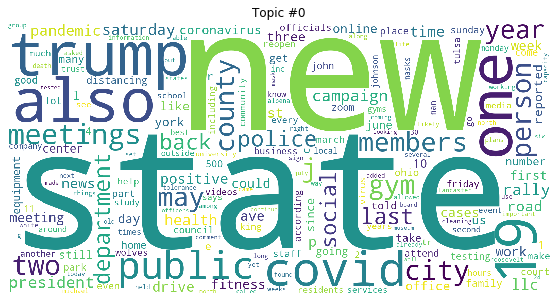

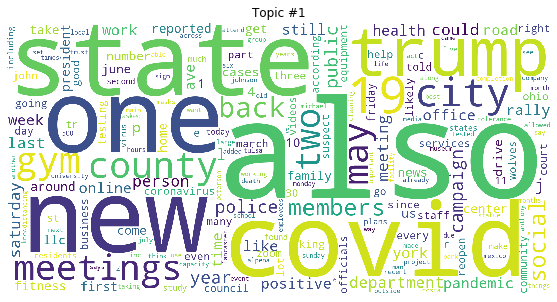

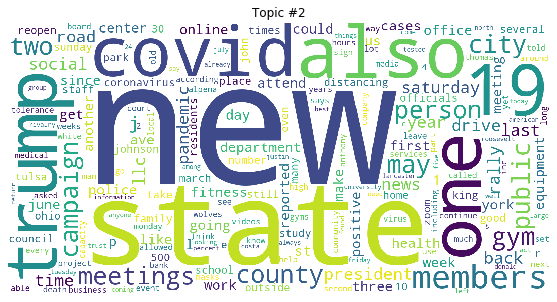

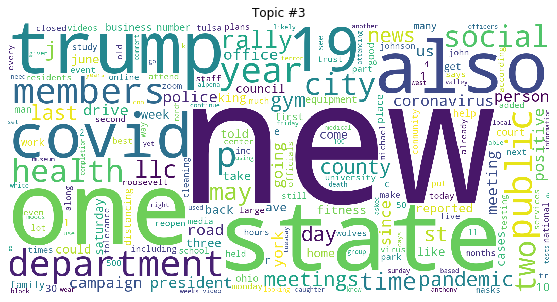

In [32]:
for t in range(ldamodel.num_topics):
    plt.figure(figsize=(10,5))
    wordcloud = WordCloud(width=1600, height=800,background_color = 'white').fit_words(dict(ldamodel.show_topic(t, 200)))
    plt.imshow(wordcloud)
    #background_color="rgba(255, 255, 255, 0)"
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()